In [1]:
!pip install qiskit qiskit-aer --upgrade

Multi-Qubit Gate Operations (Qiskit)

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a 2-qubit circuit
qc = QuantumCircuit(2, 2)

# --- Apply multi-qubit gates ---
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT with control 0 and target 1
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # Swap qubit 0 and 1

# Measure all qubits
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# Run simulation
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# Display results
counts = result.get_counts()
print("\nMeasurement Counts:", counts)

Quantum Circuit:
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts: {'00 00': 507, '11 00': 517}


Task 1: Control/Target Variation

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()

qc = QuantumCircuit(2, 2)

# --- Apply multi-qubit gates with swapped control and target ---
qc.h(1)        # Apply Hadamard on qubit 1 instead of 0
qc.cx(1, 0)    # CNOT with control=1, target=0 (swapped)
qc.cz(1, 0)    # Controlled-Z with control=1, target=0
qc.swap(0, 1)  # SWAP gate

qc.measure_all()

print("Quantum Circuit (Swapped Control/Target):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Swapped Control/Target):
             ┌───┐       ░ ┌─┐   
   q_0: ─────┤ X ├─■──X──░─┤M├───
        ┌───┐└─┬─┘ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├──■───■──X──░──╫─┤M├
        └───┘            ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts: {'00 00': 544, '11 00': 480}


Task 2: Gate Removal

Without SWAP

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(2, 2)

qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT gate
qc.cz(0, 1)    # Controlled-Z

qc.measure_all()

print("Quantum Circuit (Without SWAP):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Without SWAP):
        ┌───┐         ░ ┌─┐   
   q_0: ┤ H ├──■───■──░─┤M├───
        └───┘┌─┴─┐ │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──░──╫─┤M├
             └───┘    ░  ║ └╥┘
   c: 2/═════════════════╬══╬═
                         ║  ║ 
meas: 2/═════════════════╩══╩═
                         0  1 

Measurement Counts: {'11 00': 523, '00 00': 501}


Without Hadamard

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(2, 2)

qc.cx(0, 1)    # CNOT gate
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # Removed SWAP gate

qc.measure_all()

print("Quantum Circuit (Without Hadamard):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Without Hadamard):
                    ░ ┌─┐   
   q_0: ──■───■──X──░─┤M├───
        ┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ X ├─■──X──░──╫─┤M├
        └───┘       ░  ║ └╥┘
   c: 2/═══════════════╬══╬═
                       ║  ║ 
meas: 2/═══════════════╩══╩═
                       0  1 

Measurement Counts: {'00 00': 1024}


Without CNOT

In [20]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(2, 2)

qc.h(0)        # Hadamard on qubit 0
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # Removed SWAP gate

qc.measure_all()

print("Quantum Circuit (Without CNOT):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Without CNOT):
        ┌───┐       ░ ┌─┐   
   q_0: ┤ H ├─■──X──░─┤M├───
        └───┘ │  │  ░ └╥┘┌─┐
   q_1: ──────■──X──░──╫─┤M├
                    ░  ║ └╥┘
   c: 2/═══════════════╬══╬═
                       ║  ║ 
meas: 2/═══════════════╩══╩═
                       0  1 

Measurement Counts: {'10 00': 501, '00 00': 523}


Without Controlled-z

In [22]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(2, 2)

qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT gate
qc.swap(0, 1)  # Removed SWAP gate

qc.measure_all()

print("Quantum Circuit (Without Controlled-z):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Without Controlled-z):
        ┌───┐         ░ ┌─┐   
   q_0: ┤ H ├──■───X──░─┤M├───
        └───┘┌─┴─┐ │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─X──░──╫─┤M├
             └───┘    ░  ║ └╥┘
   c: 2/═════════════════╬══╬═
                         ║  ║ 
meas: 2/═════════════════╩══╩═
                         0  1 

Measurement Counts: {'11 00': 532, '00 00': 492}


Task 3: Add Another Hadamard

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
qc = QuantumCircuit(2, 2)

qc.h(0)        # Hadamard on qubit 0
qc.h(1)        # Added Hadamard on qubit 1
qc.cx(0, 1)    # CNOT
qc.cz(0, 1)    # Controlled-Z
qc.swap(0, 1)  # SWAP gate

qc.measure_all()

print("Quantum Circuit (Added H on Qubit 1):")
print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)


Quantum Circuit (Added H on Qubit 1):
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        ├───┤┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■──X──░──╫─┤M├
        └───┘└───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts: {'00 00': 260, '10 00': 289, '01 00': 247, '11 00': 228}


Original Circuit:
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts (Original): {'11 00': 473, '00 00': 551}

Modified Circuit (Added H on Qubit 1):
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        ├───┤┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■──X──░──╫─┤M├
        └───┘└───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 

Measurement Counts (Modified): {'10 00': 248, '00 00': 262, '11 00': 243, '01 00': 271}

Comparison Histogram:


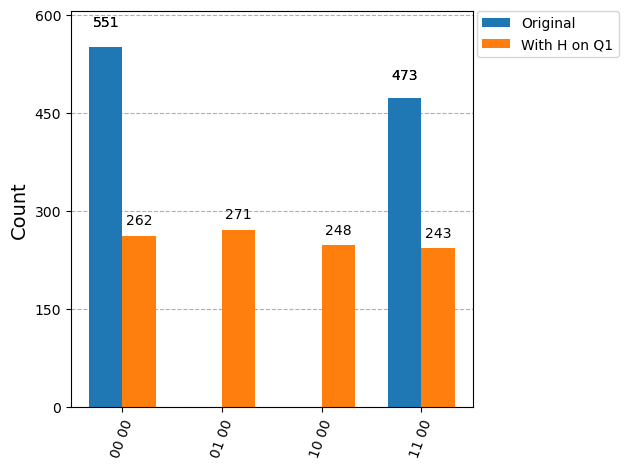

In [37]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
sim = AerSimulator()

# -----------------------------
# Original Circuit
# -----------------------------
qc_original = QuantumCircuit(2, 2)
qc_original.h(0)
qc_original.cx(0, 1)
qc_original.cz(0, 1)
qc_original.swap(0, 1)
qc_original.measure_all()

compiled_orig = transpile(qc_original, sim)
result_orig = sim.run(compiled_orig, shots=1024).result()
counts_orig = result_orig.get_counts()

print("Original Circuit:")
print(qc_original.draw())
print("\nMeasurement Counts (Original):", counts_orig)

# -----------------------------
# Modified Circuit (Add H on qubit 1)
# -----------------------------
qc_modified = QuantumCircuit(2, 2)
qc_modified.h(0)
qc_modified.h(1)      # Added Hadamard on qubit 1
qc_modified.cx(0, 1)
qc_modified.cz(0, 1)
qc_modified.swap(0, 1)
qc_modified.measure_all()

compiled_mod = transpile(qc_modified, sim)
result_mod = sim.run(compiled_mod, shots=1024).result()
counts_mod = result_mod.get_counts()

print("\nModified Circuit (Added H on Qubit 1):")
print(qc_modified.draw())
print("\nMeasurement Counts (Modified):", counts_mod)

# -----------------------------
# Compare Results Visually
# -----------------------------
print("\nComparison Histogram:")
display(plot_histogram([counts_orig, counts_mod], legend=['Original', 'With H on Q1']))
plt.show()
